<a href="https://colab.research.google.com/github/ultimatexlerion/ProyectoFinalPrediccionClimaColombia/blob/main/Proyecto_Prediccion_Clima_IDEAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
!pip install geopandas matplotlib
!pip install pandas
!pip install pandas geopandas folium
!pip install pandas geopy

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

**Objetivo del proyecto:**

1.   Buscar estaciones cercanas a la ubicación del usuario
2.   intentar Predecir la probabilidad del tipo de clima hay en el destino que el usuario va a tomar.




In [182]:
datos = data_url = "https://www.datos.gov.co/resource/57sv-p2fu.json"

df = pd.read_json(datos)
df.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad
0,2120500204,70,2024-09-14T18:00:00.000,17.2,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,2120500204,69,2024-09-14T18:04:00.000,17.2,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,2120500204,70,2024-09-14T19:00:00.000,16.7,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,2120500204,69,2024-09-14T19:01:00.000,16.7,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,2120500204,70,2024-09-14T19:55:00.000,16.1,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [183]:
df.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad
0,2120500204,70,2024-09-14T18:00:00.000,17.2,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,2120500204,69,2024-09-14T18:04:00.000,17.2,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,2120500204,70,2024-09-14T19:00:00.000,16.7,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,2120500204,69,2024-09-14T19:01:00.000,16.7,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,2120500204,70,2024-09-14T19:55:00.000,16.1,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [184]:
df.tail() #Revisar la cola de los datos

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad
995,14015010,104,2024-09-15T18:00:00.000,39.0,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,DIRECCIÓN DEL VIENTO,GN,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
996,29045190,70,2024-09-15T17:59:00.000,30.0,AEROPUERTO E. CORTISSOZ,ATLANTICO,SOLEDAD,BAJO MAGDALENA,10.917778,-74.779722,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
997,14015010,240,2024-09-15T18:00:00.000,0.0,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
998,14015010,70,2024-09-15T18:00:00.000,30.0,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
999,14015010,240,2024-09-15T17:50:00.000,0.0,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [185]:
# Ver información general del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codigoestacion     1000 non-null   int64  
 1   codigosensor       1000 non-null   int64  
 2   fechaobservacion   1000 non-null   object 
 3   valorobservado     1000 non-null   float64
 4   nombreestacion     1000 non-null   object 
 5   departamento       1000 non-null   object 
 6   municipio          1000 non-null   object 
 7   zonahidrografica   1000 non-null   object 
 8   latitud            1000 non-null   float64
 9   longitud           1000 non-null   float64
 10  descripcionsensor  1000 non-null   object 
 11  unidadmedida       1000 non-null   object 
 12  entidad            1000 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [186]:
zonash=df['zonahidrografica'].nunique()
print(zonash)

22


In [187]:
# Ver los cambios de tipos de datos que se realizaron
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codigoestacion     1000 non-null   int64  
 1   codigosensor       1000 non-null   int64  
 2   fechaobservacion   1000 non-null   object 
 3   valorobservado     1000 non-null   float64
 4   nombreestacion     1000 non-null   object 
 5   departamento       1000 non-null   object 
 6   municipio          1000 non-null   object 
 7   zonahidrografica   1000 non-null   object 
 8   latitud            1000 non-null   float64
 9   longitud           1000 non-null   float64
 10  descripcionsensor  1000 non-null   object 
 11  unidadmedida       1000 non-null   object 
 12  entidad            1000 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [188]:
# Eliminar filas con valores nulos
#df = df.dropna()

In [189]:
fechaobs=df['fechaobservacion'].nunique()
print(fechaobs)

157


In [190]:
latitudes=df['latitud'].nunique()
print(latitudes)

63


In [191]:
longitudes=df['longitud'].nunique()
print(longitudes)

62


In [192]:
#Extraer año, mes, día
df['fechaobservacion'] = pd.to_datetime(df['fechaobservacion'])
print(df['fechaobservacion'])

0     2024-09-14 18:00:00
1     2024-09-14 18:04:00
2     2024-09-14 19:00:00
3     2024-09-14 19:01:00
4     2024-09-14 19:55:00
              ...        
995   2024-09-15 18:00:00
996   2024-09-15 17:59:00
997   2024-09-15 18:00:00
998   2024-09-15 18:00:00
999   2024-09-15 17:50:00
Name: fechaobservacion, Length: 1000, dtype: datetime64[ns]


In [193]:
#Convertir el valor Observado a entero
df['valorobservado'] = df['valorobservado'].astype(int)

0      17
1      17
2      16
3      16
4      16
       ..
995    39
996    30
997     0
998    30
999     0
Name: valorobservado, Length: 1000, dtype: int64


array([[<Axes: title={'center': 'valorobservado'}>]], dtype=object)

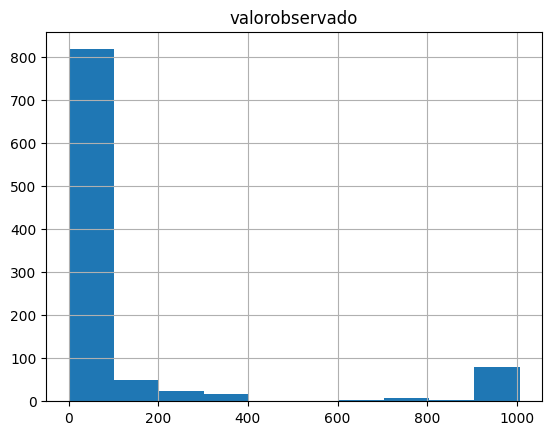

In [194]:
#ver el valor observado
print(df['valorobservado'])
#Graficar en un mapa los valores Observados
df.hist('valorobservado')

# **Graficar Mapas con Geocordenadas**

In [195]:
df['valorobservado'] = df['valorobservado'].astype(int)

In [196]:
df['fechaobservacion'] = pd.to_datetime(df['fechaobservacion'])

In [197]:
print(df.dtypes)

codigoestacion                int64
codigosensor                  int64
fechaobservacion     datetime64[ns]
valorobservado                int64
nombreestacion               object
departamento                 object
municipio                    object
zonahidrografica             object
latitud                     float64
longitud                    float64
descripcionsensor            object
unidadmedida                 object
entidad                      object
dtype: object


Convertir Fecha Observacion a DateTime

In [198]:
df['latitud'] = df['latitud'].astype(float)
df['longitud'] = df['longitud'].astype(float)

In [199]:
df['fechaobservacion'] = pd.to_datetime(df['fechaobservacion'], errors='coerce')

In [200]:
invalid_dates = df[df['fechaobservacion'].isnull()]
if not invalid_dates.empty:
    print("Invalid dates found:")
    print(invalid_dates)
    # Manejar fechas no válidas (por ejemplo, eliminar o reemplazar)

In [201]:
# Filtrar las fechas fuera de un rango razonable (ajustar según sea necesario)
start_date = pd.Timestamp('1900-01-01')
end_date = pd.Timestamp('2100-01-01')

In [202]:
# Convertir 'fechaobservacion' a datetime si aún no lo está
df['fechaobservacion'] = pd.to_datetime(df['fechaobservacion'], errors='coerce')

In [ ]:
# Filtrar fechas fuera del rango válido
df = df[(df['fechaobservacion'] >= start_date) & (df['fechaobservacion'] <= end_date)]

In [203]:
# Ahora puede convertir de forma segura a valores numéricos si es necesario
df['fechaobservacion_num'] = df['fechaobservacion'].apply(lambda x: x.toordinal() if pd.notna(x) else np.nan)

In [204]:
# Convertir 'fechaobservacion_num' de nuevo a fecha y hora
df['fechaobservacion'] = pd.to_datetime(df['fechaobservacion_num'], unit='D', errors='coerce')

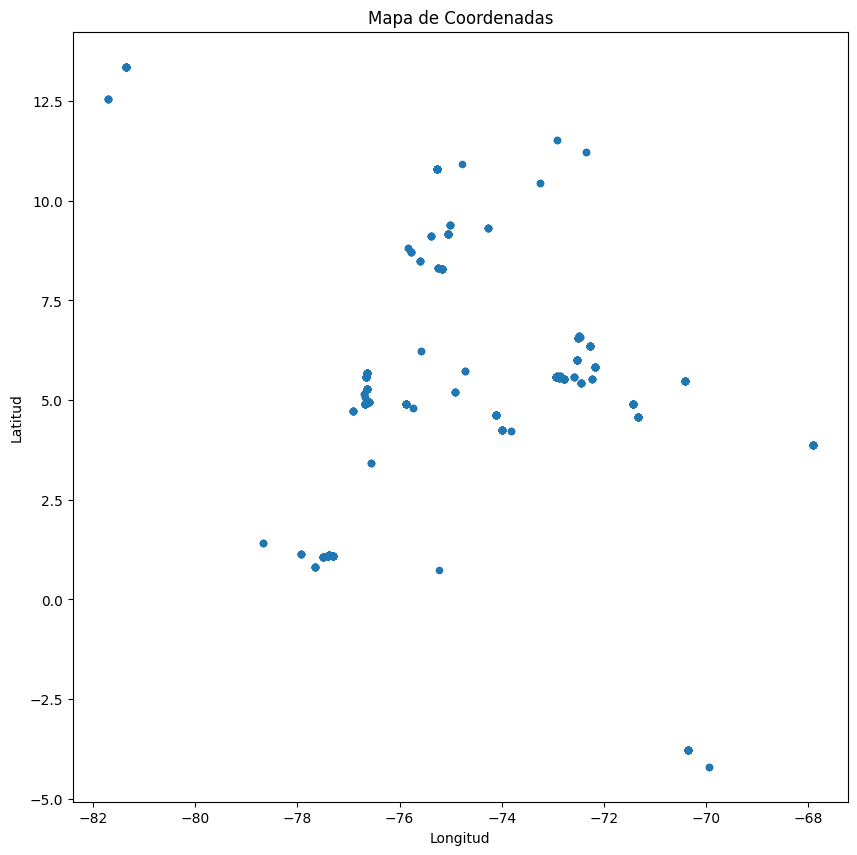

In [205]:
fig, ax = plt.subplots(figsize=(10, 10))

# Suponiendo que se quiere trazar 'latitud' y 'longitud'
df.plot(x='longitud', y='latitud', kind='scatter', ax=ax)

# Configurar el título y etiquetas de los ejes
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

ax.set_title('Mapa de Coordenadas')
plt.show()

In [206]:
# Convertir a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitud, df.latitud))

# Calcular Coordenadas

In [207]:
def calculate_distance(row, point):
    point_coords = (row['latitud'], row['longitud'])
    return geodesic(point, point_coords).kilometers

In [208]:
# lista con todas las ciudades  principales de colombia

ciudades_principales_colombia = {
    "Bogotá": (4.60971, -74.08175),
    "Medellín": (6.25184, -75.56359),
    "Cali": (3.43722, -76.5225),
    "Barranquilla": (10.96854, -74.78132),
    "Cartagena": (10.39972, -75.51444),
    "Cúcuta": (7.89391, -72.50782),
    "Bucaramanga": (7.12539, -73.1198),
    "Pereira": (4.81333, -75.69611),
    "Santa Marta": (11.24079, -74.19904),
    "Ibagué": (4.43889, -75.23222),
    "Villavicencio": (4.142, -73.62664),
    "Pasto": (1.21361, -77.28111),
    "Manizales": (5.06889, -75.51738),
    "Montería": (8.74798, -75.88143),
    "Neiva": (2.9273, -75.28189),
    "Armenia": (4.570868, -75.23222),
    "Sincelejo": (9.30472, -75.39774),
    "Valledupar": (10.46314, -73.25322),
    "Tunja": (5.53528, -73.36778),
    "Popayán" : (2.43823, -76.61316)
}

In [209]:
# crear diccionario con data de clima simulado en las diferentes ciudades de colombia

clima_simulado = {
    "Bogotá": {"temperatura": 15, "humedad": 70, "precipitacion": 50, "viento": 10},
    "Medellín": {"temperatura": 22, "humedad": 60, "precipitacion": 30, "viento": 15},
    "Cali": {"temperatura": 28, "humedad": 75, "precipitacion": 60, "viento": 5},
    "Barranquilla": {"temperatura": 30, "humedad": 70, "precipitacion": 40, "viento": 20},
    "Cartagena": {"temperatura": 32, "humedad": 80, "precipitacion": 70, "viento": 10},
    "Cúcuta": {"temperatura": 25, "humedad": 65, "precipitacion": 20, "viento": 12},
    "Bucaramanga": {"temperatura": 24, "humedad": 70, "precipitacion": 40, "viento": 15},
    "Pereira": {"temperatura": 26, "humedad": 75, "precipitacion": 50, "viento": 8},
    "Santa Marta": {"temperatura": 31, "humedad": 70, "precipitacion": 30, "viento": 18},
    "Ibagué": {"temperatura": 27, "humedad": 70, "precipitacion": 40, "viento": 10},
    "Villavicencio": {"temperatura": 29, "humedad": 75, "precipitacion": 60, "viento": 12},
    "Pasto": {"temperatura": 12, "humedad": 80, "precipitacion": 70, "viento": 5},
    "Manizales": {"temperatura": 20, "humedad": 70, "precipitacion": 40, "viento": 10},
    "Montería": {"temperatura": 30, "humedad": 75, "precipitacion": 50, "viento": 15},
    "Neiva": {"temperatura": 28, "humedad": 70, "precipitacion": 30, "viento": 8},
    "Armenia": {"temperatura": 25, "humedad": 70, "precipitacion": 40, "viento": 10},
    "Sincelejo": {"temperatura": 29, "humedad": 75, "precipitacion": 50, "viento": 12},
    "Valledupar": {"temperatura": 32, "humedad": 70, "precipitacion": 20, "viento": 18},
    "Tunja": {"temperatura": 18, "humedad": 70, "precipitacion": 40, "viento": 10},
    "Popayán": {"temperatura": 26, "humedad": 75, "precipitacion": 60, "viento": 5}
}


In [210]:
# crear una lista desplegable para elegir la ciudad

import ipywidgets as widgets

# Crear la lista desplegable
city_dropdown = widgets.Dropdown(
    options=list(ciudades_principales_colombia.keys()),
    value=list(ciudades_principales_colombia.keys())[0],
    description='Ciudad:',
)

display(city_dropdown)


Dropdown(description='Ciudad:', options=('Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', …

In [261]:
# seleccionar la ciudad escogida por el usuario en una variable

selected_city = city_dropdown.value


In [262]:
selected_city
clima_simulado[selected_city]

{'temperatura': 27, 'humedad': 70, 'precipitacion': 40, 'viento': 10}

In [263]:
df.head(1)

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad,fechaobservacion_num
0,2120500204,70,NaT,17,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,739143


In [213]:
# crear ejemplo de un diccionario con datos de la movilidad y posiciones de geolocalización aleatorias dependiendo la ciudad elegida por el usuario,  indicar las distancias aleatorias de un usuario, mostrar la unidadmedida y el valorobservado ccon las posicion aleatoria de los usuarios crear posiciones de usuarios aleatorios en sus  posiones aleatorias dentro del mapa y con el clima del lugar

import random

def generar_datos_movilidad(ciudad):
  """
  Genera datos de movilidad y geolocalización aleatorios para una ciudad dada.

  Args:
    ciudad: El nombre de la ciudad.

  Returns:
    Un diccionario con datos de movilidad y geolocalización aleatorios.
  """
  # Obtener coordenadas de la ciudad
  latitud_ciudad, longitud_ciudad = ciudades_principales_colombia[ciudad]

  # Generar datos aleatorios para 10 usuarios
  datos_movilidad = {}
  for i in range(10):
    # Generar coordenadas aleatorias cerca de la ciudad
    latitud_usuario = latitud_ciudad + random.uniform(-0.1, 0.1)
    longitud_usuario = longitud_ciudad + random.uniform(-0.1, 0.1)

    # Generar distancia aleatoria
    distancia = random.uniform(0, 100)  # Distancia en kilómetros

    # Generar valor observado aleatorio
    valor_observado = random.randint(0, 100)

    # Guardar los datos del usuario
    datos_movilidad[f"Usuario {i+1}"] = {
        "latitud": latitud_usuario,
        "longitud": longitud_usuario,
        "distancia": f"{distancia} km",
        "valor_observado": valor_observado,
        "clima": clima_simulado[ciudad]
    }

  return datos_movilidad

# Ejemplo de uso
datos_movilidad_bogota = generar_datos_movilidad("Bogotá")
print(datos_movilidad_bogota)


{'Usuario 1': {'latitud': 4.589490519427521, 'longitud': -74.06998413153649, 'distancia': '82.26721582680099 km', 'valor_observado': 40, 'clima': {'temperatura': 15, 'humedad': 70, 'precipitacion': 50, 'viento': 10}}, 'Usuario 2': {'latitud': 4.604714347060478, 'longitud': -74.03393329708362, 'distancia': '8.818755366671905 km', 'valor_observado': 2, 'clima': {'temperatura': 15, 'humedad': 70, 'precipitacion': 50, 'viento': 10}}, 'Usuario 3': {'latitud': 4.583675942582668, 'longitud': -74.17632718828862, 'distancia': '49.88325855894209 km', 'valor_observado': 14, 'clima': {'temperatura': 15, 'humedad': 70, 'precipitacion': 50, 'viento': 10}}, 'Usuario 4': {'latitud': 4.616707555304175, 'longitud': -74.07149469195818, 'distancia': '14.662075647476003 km', 'valor_observado': 51, 'clima': {'temperatura': 15, 'humedad': 70, 'precipitacion': 50, 'viento': 10}}, 'Usuario 5': {'latitud': 4.556132403526389, 'longitud': -73.98736176807927, 'distancia': '77.35370206224763 km', 'valor_observado':

In [264]:
# crear diccionario con posiciones aleatorias  de un usuario  y guardar esa posicion en una variable

import random

def create_random_position(city_coords):
  """
  Crea una posición aleatoria cerca de las coordenadas de una ciudad.

  Args:
    city_coords: Tupla con las coordenadas de la ciudad (latitud, longitud).

  Returns:
    Un diccionario con la latitud y longitud de la posición aleatoria.
  """

  # Generar coordenadas aleatorias cerca de la ciudad
  lat = city_coords[0] + random.uniform(-0.1, 0.1)
  lon = city_coords[1] + random.uniform(-0.1, 0.1)

  # Crear un diccionario con la posición aleatoria
  position = {
      "latitude": lat,
      "longitude": lon
  }

  return position

# Ejemplo de uso
city_coords = (4.60971, -74.08175)  # Coordenadas de Bogotá
user_position = create_random_position(city_coords)

print(user_position)


{'latitude': 4.69150982114215, 'longitude': -74.1183215319502}


In [265]:
# crear mapa graficando la ciudad seleccionada por el usuario y graficar la distance y distance_to_user con graficar datos de la funcion create_mobility_data en la descripcion,  y colocar una imagen de circuitos en cada uno de los iconos de las estaciones con iconos color verde y el color del icono del usuario en azul, pasar los kilometros de a 3 digitos, poner el mapa en pantalla adaptable

import folium
from geopy.distance import geodesic
import random

def create_mobility_data(ciudad):
  """
  Genera datos de movilidad y geolocalización aleatorios para una ciudad dada.

  Args:
    ciudad: El nombre de la ciudad.

  Returns:
    Un diccionario con datos de movilidad y geolocalización aleatorios.
  """
  # Obtener coordenadas de la ciudad
  latitud_ciudad, longitud_ciudad = ciudades_principales_colombia[ciudad]

  # Generar datos aleatorios para 10 usuarios
  datos_movilidad = {}
  for i in range(10):
    # Generar coordenadas aleatorias cerca de la ciudad
    latitud_usuario = latitud_ciudad + random.uniform(-0.1, 0.1)
    longitud_usuario = longitud_ciudad + random.uniform(-0.1, 0.1)

    # Generar distancia aleatoria
    distancia = random.uniform(0, 100)  # Distancia en kilómetros

    # Generar valor observado aleatorio
    valor_observado = random.randint(0, 100)

    # Guardar los datos del usuario
    datos_movilidad[f"Usuario {i+1}"] = {
        "latitud": latitud_usuario,
        "longitud": longitud_usuario,
        "distancia": f"{distancia:.3f} km",
        "valor_observado": valor_observado,
        "clima": clima_simulado[ciudad]
    }

  return datos_movilidad

def create_random_position(city_coords):
  """
  Crea una posición aleatoria cerca de las coordenadas de una ciudad.

  Args:
    city_coords: Tupla con las coordenadas de la ciudad (latitud, longitud).

  Returns:
    Un diccionario con la latitud y longitud de la posición aleatoria.
  """

  # Generar coordenadas aleatorias cerca de la ciudad
  lat = city_coords[0] + random.uniform(-0.1, 0.1)
  lon = city_coords[1] + random.uniform(-0.1, 0.1)

  # Crear un diccionario con la posición aleatoria
  position = {
      "latitude": lat,
      "longitude": lon
  }

  return position

# Obtener la ciudad seleccionada por el usuario
selected_city = city_dropdown.value

# Obtener las coordenadas de la ciudad seleccionada
city_coords = ciudades_principales_colombia[selected_city]

# Crear la posición aleatoria del usuario
user_position = create_random_position(city_coords)

# Generar datos de movilidad para la ciudad seleccionada
datos_movilidad = create_mobility_data(selected_city)

# Crear el mapa
map_center = city_coords
my_map = folium.Map(location=map_center, zoom_start=12)

# Agregar un marcador para la ciudad seleccionada
folium.Marker(
    location=city_coords,
    popup=f"<b>{selected_city}</b>",
    icon=folium.Icon(color="red", icon="info-sign")
).add_to(my_map)

# Agregar marcadores para las estaciones y el usuario
for user_id, data in datos_movilidad.items():
  # Calcular la distancia entre la estación y el usuario
  station_coords = (data["latitud"], data["longitud"])
  distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

  # Agregar marcador para la estación
  folium.Marker(
      location=station_coords,
      popup=f"<b>Estación {user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
      icon=folium.DivIcon(
          html=f'<img src="https://cdn-icons-png.flaticon.com/512/2972/2972202.png" width="30" height="30">'  # Imagen de circuitos
      )
  ).add_to(my_map)

# Agregar marcador para el usuario
folium.Marker(
    location=[user_position["latitude"], user_position["longitude"]],
    popup="<b>Usuario</b>",
    icon=folium.Icon(color="blue", icon="user")
).add_to(my_map)

# Mostrar el mapa
display(my_map)


In [266]:
# crear diccionar de posiciones de carros con datos aleatorios para todas las ciudades de colombia

import random


def create_car_positions(cities):
  """
  Crea un diccionario de posiciones de carros con datos aleatorios para todas las ciudades de Colombia.

  Args:
    cities: Un diccionario con las coordenadas de las ciudades.

  Returns:
    Un diccionario con las posiciones de los carros para cada ciudad.
  """
  car_positions = {}
  for city, coords in cities.items():
    car_positions[city] = []
    for _ in range(10):  # Generar 10 posiciones de carros por ciudad
      lat = coords[0] + random.uniform(-0.1, 0.1)
      lon = coords[1] + random.uniform(-0.1, 0.1)
      car_positions[city].append({"latitude": lat, "longitude": lon})
  return car_positions

# Crear el diccionario de posiciones de carros
car_positions_colombia = create_car_positions(ciudades_principales_colombia)

# Imprimir el diccionario
print(car_positions_colombia)


{'Bogotá': [{'latitude': 4.579372730825749, 'longitude': -74.02128404462235}, {'latitude': 4.664368529631578, 'longitude': -73.99976604745578}, {'latitude': 4.6896431028977785, 'longitude': -74.12008572637951}, {'latitude': 4.567098982606337, 'longitude': -74.1467030726334}, {'latitude': 4.6250343623858265, 'longitude': -74.0586366685396}, {'latitude': 4.649102823724712, 'longitude': -74.05445871762497}, {'latitude': 4.660512446549618, 'longitude': -74.16040985920361}, {'latitude': 4.63712001379312, 'longitude': -74.17507667504772}, {'latitude': 4.639260355440614, 'longitude': -73.99122172865371}, {'latitude': 4.624215909340008, 'longitude': -74.07247514819208}], 'Medellín': [{'latitude': 6.160351797847206, 'longitude': -75.54271372258798}, {'latitude': 6.298300526442949, 'longitude': -75.5748624254901}, {'latitude': 6.178664515085798, 'longitude': -75.60336310783369}, {'latitude': 6.24226679144706, 'longitude': -75.53890072642463}, {'latitude': 6.171289074448915, 'longitude': -75.6009

In [267]:
# agregar al mapa los resultados anteriores los datos del diccionario ciudades_principales_colombia del clima con iconos azules, create_car_positions en color rojo y con icono de carros, las estaciones y cual esta mas cerca al usuario trazando el algoritmo manhatan, exportar el resultado a un archivo html con los nombres de las entidades


# Crear el mapa
map_center = city_coords
my_map = folium.Map(location=map_center, zoom_start=12)

# Agregar un marcador para la ciudad seleccionada
folium.Marker(
    location=city_coords,
    popup=f"<b>{selected_city}</b>",
    icon=folium.Icon(color="red", icon="info-sign")
).add_to(my_map)

# Agregar marcadores para las estaciones y el usuario
for user_id, data in datos_movilidad.items():
  # Calcular la distancia entre la estación y el usuario
  station_coords = (data["latitud"], data["longitud"])
  distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

  # Agregar marcador para la estación
  folium.Marker(
      location=station_coords,
      popup=f"<b>Estación {user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
      icon=folium.DivIcon(
          html=f'<img src="https://cdn-icons-png.flaticon.com/512/2972/2972202.png" width="30" height="30">'  # Imagen de circuitos
      )
  ).add_to(my_map)

# Agregar marcador para el usuario
folium.Marker(
    location=[user_position["latitude"], user_position["longitude"]],
    popup="<b>Usuario</b>",
    icon=folium.Icon(color="blue", icon="user")
).add_to(my_map)


# Agregar marcadores para las ciudades con datos de clima
for city, coords in ciudades_principales_colombia.items():
  folium.Marker(
      location=coords,
      popup=f"<b>{city}</b><br>Temperatura: {clima_simulado[city]['temperatura']}°C<br>Humedad: {clima_simulado[city]['humedad']}%<br>Precipitación: {clima_simulado[city]['precipitacion']}%",
      icon=folium.Icon(color="blue", icon="cloud")
  ).add_to(my_map)

# Agregar marcadores para las posiciones de los carros
for city, car_positions in car_positions_colombia.items():
  for position in car_positions:
    folium.Marker(
        location=[position["latitude"], position["longitude"]],
        popup=f"<b>Carro en {city}</b>",
        icon=folium.Icon(color="red", icon="car")
    ).add_to(my_map)

# Calcular la estación más cercana al usuario usando el algoritmo Manhattan
closest_station = None
closest_distance = float('inf')
for user_id, data in datos_movilidad.items():
  station_coords = (data["latitud"], data["longitud"])
  distance = abs(user_position["latitude"] - data["latitud"]) + abs(user_position["longitude"] - data["longitud"])
  if distance < closest_distance:
    closest_distance = distance
    closest_station = user_id

# Agregar un popup para la estación más cercana
folium.Marker(
    location=[datos_movilidad[closest_station]["latitud"], datos_movilidad[closest_station]["longitud"]],
    popup=f"<b>Estación más cercana: {closest_station}</b>",
    icon=folium.Icon(color="green", icon="info-sign")
).add_to(my_map)

# Exportar el mapa a un archivo HTML
my_map.save("mapa_colombia.html")

# Mostrar el mapa
display(my_map)


In [268]:
df.tail() #Revisar la cola de los datos

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad,fechaobservacion_num
995,14015010,104,NaT,39,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,DIRECCIÓN DEL VIENTO,GN,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,739144
996,29045190,70,NaT,30,AEROPUERTO E. CORTISSOZ,ATLANTICO,SOLEDAD,BAJO MAGDALENA,10.917778,-74.779722,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,739144
997,14015010,240,NaT,0,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,739144
998,14015010,70,NaT,30,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,739144
999,14015010,240,NaT,0,GALERAZAMBA,BOLIVAR,SANTA CATALINA,CARIBE - LITORAL,10.794167,-75.260556,PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,739144


In [269]:
# trazar el vector manhatan en la distancia mas cerca al usuario


# Crear el mapa
map_center = city_coords
my_map = folium.Map(location=map_center, zoom_start=12)

# Agregar un marcador para la ciudad seleccionada
folium.Marker(
    location=city_coords,
    popup=f"<b>{selected_city}</b><br>Temperatura: {clima_simulado[selected_city]['temperatura']}°C<br>Humedad: {clima_simulado[selected_city]['humedad']}%<br>Precipitación: {clima_simulado[selected_city]['precipitacion']}%",
    icon=folium.Icon(color="red", icon="info-sign")
).add_to(my_map)

# Agregar marcadores para las estaciones y el usuario
for user_id, data in datos_movilidad.items():
  # Calcular la distancia entre la estación y el usuario
  station_coords = (data["latitud"], data["longitud"])
  distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

  # Agregar marcador para la estación
  folium.Marker(
      location=station_coords,
      popup=f"<b>Estación {user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
      icon=folium.DivIcon(
          html=f'<img src="https://cdn-icons-png.flaticon.com/512/2972/2972202.png" width="30" height="30">'  # Imagen de circuitos
      )
  ).add_to(my_map)

# Agregar marcador para el usuario
folium.Marker(
    location=[user_position["latitude"], user_position["longitude"]],
    popup="<b>Usuario</b>",
    icon=folium.Icon(color="blue", icon="user")
).add_to(my_map)


# Calcular la estación más cercana al usuario usando el algoritmo Manhattan
closest_station = None
closest_distance = float('inf')
for user_id, data in datos_movilidad.items():
  station_coords = (data["latitud"], data["longitud"])
  distance = abs(user_position["latitude"] - data["latitud"]) + abs(user_position["longitude"] - data["longitud"])
  if distance < closest_distance:
    closest_distance = distance
    closest_station = user_id

# Obtener las coordenadas de la estación más cercana
closest_station_coords = (datos_movilidad[closest_station]["latitud"], datos_movilidad[closest_station]["longitud"])

# Trazar el vector Manhattan
folium.PolyLine(
    locations=[
        [user_position["latitude"], user_position["longitude"]],
        [closest_station_coords[0], user_position["longitude"]],
        [closest_station_coords[0], closest_station_coords[1]]
    ],
    color="green",
    weight=2.5,
    opacity=1,
    dash_array="5, 10"
).add_to(my_map)

# Agregar un popup para la estación más cercana
folium.Marker(
    location=closest_station_coords,
    popup=f"<b>Estación más cercana: {closest_station}</b>",
    icon=folium.Icon(color="green", icon="info-sign")
).add_to(my_map)

# Exportar el mapa a un archivo HTML
my_map.save("mapa_colombia.html")

# Mostrar el mapa
display(my_map)



In [270]:
#  cambiar los iconos de las estaciones a color verde, colocar el nombre con el nombre de cada entidad, el mapa debe mantener los controles para cambiar de ciudad cuando el usuario lo desee siempre,

# Crear el mapa
map_center = city_coords
my_map = folium.Map(location=map_center, zoom_start=12)

# Agregar un marcador para la ciudad seleccionada
folium.Marker(
    location=city_coords,
    popup=f"<b>{selected_city}</b><br>Temperatura: {clima_simulado[selected_city]['temperatura']}°C<br>Humedad: {clima_simulado[selected_city]['humedad']}%<br>Precipitación: {clima_simulado[selected_city]['precipitacion']}%",
    icon=folium.Icon(color="red", icon="info-sign")
).add_to(my_map)

# Agregar marcadores para las estaciones y el usuario
for user_id, data in datos_movilidad.items():
  # Calcular la distancia entre la estación y el usuario
  station_coords = (data["latitud"], data["longitud"])
  distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

  # Agregar marcador para la estación
  folium.Marker(
      location=station_coords,
      popup=f"<b>{user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
      icon=folium.Icon(color="green", icon="info-sign")  # Cambiar el color a verde
  ).add_to(my_map)

# Agregar marcador para el usuario
folium.Marker(
    location=[user_position["latitude"], user_position["longitude"]],
    popup="<b>Usuario</b>",
    icon=folium.Icon(color="blue", icon="user")
).add_to(my_map)


# Calcular la estación más cercana al usuario usando el algoritmo Manhattan
closest_station = None
closest_distance = float('inf')
for user_id, data in datos_movilidad.items():
  station_coords = (data["latitud"], data["longitud"])
  distance = abs(user_position["latitude"] - data["latitud"]) + abs(user_position["longitude"] - data["longitud"])
  if distance < closest_distance:
    closest_distance = distance
    closest_station = user_id

# Obtener las coordenadas de la estación más cercana
closest_station_coords = (datos_movilidad[closest_station]["latitud"], datos_movilidad[closest_station]["longitud"])

# Trazar el vector Manhattan
folium.PolyLine(
    locations=[
        [user_position["latitude"], user_position["longitude"]],
        [closest_station_coords[0], user_position["longitude"]],
        [closest_station_coords[0], closest_station_coords[1]]
    ],
    color="green",
    weight=2.5,
    opacity=1,
    dash_array="5, 10"
).add_to(my_map)

# Agregar un popup para la estación más cercana
folium.Marker(
    location=closest_station_coords,
    popup=f"<b>Estación más cercana: {closest_station}</b>",
    icon=folium.Icon(color="green", icon="info-sign")
).add_to(my_map)

# Exportar el mapa a un archivo HTML
my_map.save("mapa_colombia.html")

# Mostrar el mapa
display(my_map)



In [271]:
# controles para cambiar de ciudad solo refrescar la pantalla al elegir y actualizar con el nuevo resultado

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
import random


# Crear la lista desplegable
city_dropdown = widgets.Dropdown(
    options=list(ciudades_principales_colombia.keys()),
    value=list(ciudades_principales_colombia.keys())[0],
    description='Ciudad:',
)

# Crear un widget de salida para mostrar el mapa
output = widgets.Output()

# Función para actualizar el mapa
def update_map(change):
  with output:
    # Limpiar la salida anterior
    output.clear_output()

    # Obtener la ciudad seleccionada
    selected_city = change.new

    # Obtener las coordenadas de la ciudad seleccionada
    city_coords = ciudades_principales_colombia[selected_city]

    # Crear la posición aleatoria del usuario
    user_position = create_random_position(city_coords)

    # Generar datos de movilidad para la ciudad seleccionada
    datos_movilidad = create_mobility_data(selected_city)

    # Crear el mapa
    map_center = city_coords
    my_map = folium.Map(location=map_center, zoom_start=12)

    # Agregar un marcador para la ciudad seleccionada
    folium.Marker(
        location=city_coords,
        popup=f"<b>{selected_city}</b><br>Temperatura: {clima_simulado[selected_city]['temperatura']}°C<br>Humedad: {clima_simulado[selected_city]['humedad']}%<br>Precipitación: {clima_simulado[selected_city]['precipitacion']}%",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(my_map)

    # Agregar marcadores para las estaciones y el usuario
    for user_id, data in datos_movilidad.items():
      # Calcular la distancia entre la estación y el usuario
      station_coords = (data["latitud"], data["longitud"])
      distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

      # Agregar marcador para la estación
      folium.Marker(
          location=station_coords,
          popup=f"<b>{user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
          icon=folium.Icon(color="green", icon="info-sign")  # Cambiar el color a verde
      ).add_to(my_map)

    # Agregar marcador para el usuario
    folium.Marker(
        location=[user_position["latitude"], user_position["longitude"]],
        popup="<b>Usuario</b>",
        icon=folium.Icon(color="blue", icon="user")
    ).add_to(my_map)


    # Calcular la estación más cercana al usuario usando el algoritmo Manhattan
    closest_station = None
    closest_distance = float('inf')
    for user_id, data in datos_movilidad.items():
      station_coords = (data["latitud"], data["longitud"])
      distance = abs(user_position["latitude"] - data["latitud"]) + abs(user_position["longitude"] - data["longitud"])
      if distance < closest_distance:
        closest_distance = distance
        closest_station = user_id

    # Obtener las coordenadas de la estación más cercana
    closest_station_coords = (datos_movilidad[closest_station]["latitud"], datos_movilidad[closest_station]["longitud"])

    # Trazar el vector Manhattan
    folium.PolyLine(
        locations=[
            [user_position["latitude"], user_position["longitude"]],
            [closest_station_coords[0], user_position["longitude"]],
            [closest_station_coords[0], closest_station_coords[1]]
        ],
        color="green",
        weight=2.5,
        opacity=1,
        dash_array="5, 10"
    ).add_to(my_map)

    # Agregar un popup para la estación más cercana
    folium.Marker(
        location=closest_station_coords,
        popup=f"<b>Estación más cercana: {closest_station}</b>",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(my_map)

    # Exportar el mapa a un archivo HTML
    my_map.save("mapa_colombia.html")

    # Mostrar el mapa
    display(my_map)

# Asociar la función de actualización al evento de cambio de la lista desplegable
city_dropdown.observe(update_map, names='value')

# Mostrar la lista desplegable y el widget de salida
display(city_dropdown, output)


def create_car_positions(cities):
  """
  Crea un diccionario de posiciones de carros con datos aleatorios para todas las ciudades de Colombia.

  Args:
    cities: Un diccionario con las coordenadas de las ciudades.

  Returns:
    Un diccionario con las posiciones de los carros para cada ciudad.
  """
  car_positions = {}
  for city, coords in cities.items():
    car_positions[city] = []
    for _ in range(10):  # Generar 10 posiciones de carros por ciudad
      lat = coords[0] + random.uniform(-0.1, 0.1)
      lon = coords[1] + random.uniform(-0.1, 0.1)
      car_positions[city].append({"latitude": lat, "longitude": lon})
  return car_positions

# Crear el diccionario de posiciones de carros
car_positions_colombia = create_car_positions(ciudades_principales_colombia)

# Imprimir el diccionario
print(car_positions_colombia)



def create_mobility_data(ciudad):
  """
  Genera datos de movilidad y geolocalización aleatorios para una ciudad dada.

  Args:
    ciudad: El nombre de la ciudad.

  Returns:
    Un diccionario con datos de movilidad y geolocalización aleatorios.
  """
  # Obtener coordenadas de la ciudad
  latitud_ciudad, longitud_ciudad = ciudades_principales_colombia[ciudad]

  # Generar datos aleatorios para 10 usuarios
  datos_movilidad = {}
  for i in range(10):
    # Generar coordenadas aleatorias cerca de la ciudad
    latitud_usuario = latitud_ciudad + random.uniform(-0.1, 0.1)
    longitud_usuario = longitud_ciudad + random.uniform(-0.1, 0.1)

    # Generar distancia aleatoria
    distancia = random.uniform(0, 100)  # Distancia en kilómetros

    # Generar valor observado aleatorio
    valor_observado = random.randint(0, 100)

    # Guardar los datos del usuario
    datos_movilidad[f"Usuario {i+1}"] = {
        "latitud": latitud_usuario,
        "longitud": longitud_usuario,
        "distancia": f"{distancia:.3f} km",
        "valor_observado": valor_observado,
        "clima": clima_simulado[ciudad]
    }

  return datos_movilidad

def create_random_position(city_coords):
  """
  Crea una posición aleatoria cerca de las coordenadas de una ciudad.

  Args:
    city_coords: Tupla con las coordenadas de la ciudad (latitud, longitud).

  Returns:
    Un diccionario con la latitud y longitud de la posición aleatoria.
  """

  # Generar coordenadas aleatorias cerca de la ciudad
  lat = city_coords[0] + random.uniform(-0.1, 0.1)
  lon = city_coords[1] + random.uniform(-0.1, 0.1)

  # Crear un diccionario con la posición aleatoria
  position = {
      "latitude": lat,
      "longitude": lon
  }

  return position


Dropdown(description='Ciudad:', options=('Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', …

Output()

{'Bogotá': [{'latitude': 4.5458692256424715, 'longitude': -74.00747180972999}, {'latitude': 4.5581544320769165, 'longitude': -74.11548525549229}, {'latitude': 4.672442016741978, 'longitude': -73.98461948537265}, {'latitude': 4.665149273481169, 'longitude': -74.07123773951069}, {'latitude': 4.515034906913541, 'longitude': -73.99255475242222}, {'latitude': 4.597833198626103, 'longitude': -74.02869073186962}, {'latitude': 4.674636987245509, 'longitude': -74.15173591072049}, {'latitude': 4.68672475405644, 'longitude': -74.09301897916143}, {'latitude': 4.543889981616548, 'longitude': -74.14733503294372}, {'latitude': 4.551866383826048, 'longitude': -73.99497754487724}], 'Medellín': [{'latitude': 6.285695936206531, 'longitude': -75.51474064326021}, {'latitude': 6.177742140806062, 'longitude': -75.63770254303313}, {'latitude': 6.279482626110724, 'longitude': -75.57996150044808}, {'latitude': 6.194429842693743, 'longitude': -75.59527582567468}, {'latitude': 6.257610095120665, 'longitude': -75.

In [272]:
# poner los nombres de las estaciones

# Crear la lista desplegable
city_dropdown = widgets.Dropdown(
    options=list(ciudades_principales_colombia.keys()),
    value=list(ciudades_principales_colombia.keys())[0],
    description='Ciudad:',
)

# Crear un widget de salida para mostrar el mapa
output = widgets.Output()

# Función para actualizar el mapa
def update_map(change):
  with output:
    # Limpiar la salida anterior
    output.clear_output()

    # Obtener la ciudad seleccionada
    selected_city = change.new

    # Obtener las coordenadas de la ciudad seleccionada
    city_coords = ciudades_principales_colombia[selected_city]

    # Crear la posición aleatoria del usuario
    user_position = create_random_position(city_coords)

    # Generar datos de movilidad para la ciudad seleccionada
    datos_movilidad = create_mobility_data(selected_city)

    # Crear el mapa
    map_center = city_coords
    my_map = folium.Map(location=map_center, zoom_start=12)

    # Agregar un marcador para la ciudad seleccionada
    folium.Marker(
        location=city_coords,
        popup=f"<b>{selected_city}</b><br>Temperatura: {clima_simulado[selected_city]['temperatura']}°C<br>Humedad: {clima_simulado[selected_city]['humedad']}%<br>Precipitación: {clima_simulado[selected_city]['precipitacion']}%",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(my_map)

    # Agregar marcadores para las estaciones y el usuario
    for user_id, data in datos_movilidad.items():
      # Calcular la distancia entre la estación y el usuario
      station_coords = (data["latitud"], data["longitud"])
      distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

      # Agregar marcador para la estación
      folium.Marker(
          location=station_coords,
          popup=f"<b>{user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
          icon=folium.Icon(color="green", icon="info-sign")  # Cambiar el color a verde
      ).add_to(my_map)

    # Agregar marcador para el usuario
    folium.Marker(
        location=[user_position["latitude"], user_position["longitude"]],
        popup="<b>Usuario</b>",
        icon=folium.Icon(color="blue", icon="user")
    ).add_to(my_map)

    # Calcular la estación más cercana al usuario usando el algoritmo Manhattan
    closest_station = None
    closest_distance = float('inf')
    for user_id, data in datos_movilidad.items():
      station_coords = (data["latitud"], data["longitud"])
      distance = abs(user_position["latitude"] - data["latitud"]) + abs(user_position["longitude"] - data["longitud"])
      if distance < closest_distance:
        closest_distance = distance
        closest_station = user_id

    # Obtener las coordenadas de la estación más cercana
    closest_station_coords = (datos_movilidad[closest_station]["latitud"], datos_movilidad[closest_station]["longitud"])

    # Trazar el vector Manhattan
    folium.PolyLine(
        locations=[
            [user_position["latitude"], user_position["longitude"]],
            [closest_station_coords[0], user_position["longitude"]],
            [closest_station_coords[0], closest_station_coords[1]]
        ],
        color="green",
        weight=2.5,
        opacity=1,
        dash_array="5, 10"
    ).add_to(my_map)

    # Agregar un popup para la estación más cercana
    folium.Marker(
        location=closest_station_coords,
        popup=f"<b>Estación más cercana: {closest_station}</b>",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(my_map)

    # Exportar el mapa a un archivo HTML
    my_map.save("mapa_colombia.html")

    # Mostrar el mapa
    display(my_map)

# Asociar la función de actualización al evento de cambio de la lista desplegable
city_dropdown.observe(update_map, names='value')

# Mostrar la lista desplegable y el widget de salida
display(city_dropdown, output)

# ... (resto del código) ...

def create_car_positions(cities):
  """
  Crea un diccionario de posiciones de carros con datos aleatorios para todas las ciudades de Colombia.

  Args:
    cities: Un diccionario con las coordenadas de las ciudades.

  Returns:
    Un diccionario con las posiciones de los carros para cada ciudad.
  """
  car_positions = {}
  for city, coords in cities.items():
    car_positions[city] = []
    for _ in range(10):  # Generar 10 posiciones de carros por ciudad
      lat = coords[0] + random.uniform(-0.1, 0.1)
      lon = coords[1] + random.uniform(-0.1, 0.1)
      car_positions[city].append({"latitude": lat, "longitude": lon})
  return car_positions

# Crear el diccionario de posiciones de carros
car_positions_colombia = create_car_positions(ciudades_principales_colombia)

# Imprimir el diccionario
print(car_positions_colombia)


def create_mobility_data(ciudad):
  """
  Genera datos de movilidad y geolocalización aleatorios para una ciudad dada.

  Args:
    ciudad: El nombre de la ciudad.

  Returns:
    Un diccionario con datos de movilidad y geolocalización aleatorios.
  """
  # Obtener coordenadas de la ciudad
  latitud_ciudad, longitud_ciudad = ciudades_principales_colombia[ciudad]

  # Generar datos aleatorios para 10 usuarios
  datos_movilidad = {}
  for i in range(10):
    # Generar coordenadas aleatorias cerca de la ciudad
    latitud_usuario = latitud_ciudad + random.uniform(-0.1, 0.1)
    longitud_usuario = longitud_ciudad + random.uniform(-0.1, 0.1)

    # Generar distancia aleatoria
    distancia = random.uniform(0, 100)  # Distancia en kilómetros

    # Generar valor observado aleatorio
    valor_observado = random.randint(0, 100)

    # Guardar los datos del usuario
    datos_movilidad[f"Estación {i+1}"] = {
        "latitud": latitud_usuario,
        "longitud": longitud_usuario,
        "distancia": f"{distancia:.3f} km",
        "valor_observado": valor_observado,
        "clima": clima_simulado[ciudad]
    }

  return datos_movilidad

def create_random_position(city_coords):
  """
  Crea una posición aleatoria cerca de las coordenadas de una ciudad.

  Args:
    city_coords: Tupla con las coordenadas de la ciudad (latitud, longitud).

  Returns:
    Un diccionario con la latitud y longitud de la posición aleatoria.
  """

  # Generar coordenadas aleatorias cerca de la ciudad
  lat = city_coords[0] + random.uniform(-0.1, 0.1)
  lon = city_coords[1] + random.uniform(-0.1, 0.1)

  # Crear un diccionario con la posición aleatoria
  position = {
      "latitude": lat,
      "longitude": lon
  }

  return position


Dropdown(description='Ciudad:', options=('Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', …

Output()

{'Bogotá': [{'latitude': 4.647318377392248, 'longitude': -74.17413493413676}, {'latitude': 4.538356736331878, 'longitude': -74.11160191753306}, {'latitude': 4.5627649862769335, 'longitude': -74.12360022059174}, {'latitude': 4.695605061438141, 'longitude': -74.1053725206942}, {'latitude': 4.708723484809365, 'longitude': -74.16651408022119}, {'latitude': 4.647639554880864, 'longitude': -73.99083186843723}, {'latitude': 4.55220715763882, 'longitude': -73.99259946535085}, {'latitude': 4.513547500195301, 'longitude': -74.0356364817153}, {'latitude': 4.578999030748422, 'longitude': -74.02177945349653}, {'latitude': 4.667471893631622, 'longitude': -74.02711734966931}], 'Medellín': [{'latitude': 6.230446213609148, 'longitude': -75.50850176132371}, {'latitude': 6.328207142095202, 'longitude': -75.50994866580737}, {'latitude': 6.3186669873479415, 'longitude': -75.54827153870994}, {'latitude': 6.2136455560804045, 'longitude': -75.54528393607163}, {'latitude': 6.327540575829596, 'longitude': -75.5

In [273]:
# tomar los datos del clima simulado de las ciudades cercanas al usuario

def get_nearby_cities_weather(user_position, cities, clima_simulado, radius=100):
  """
  Obtiene los datos del clima simulado de las ciudades cercanas al usuario.

  Returns:
    Una lista con los datos del clima simulado de las ciudades cercanas.
  """
  nearby_cities_weather = []
  for city, coords in cities.items():
    distance = geodesic((user_position["latitude"], user_position["longitude"]), coords).km
    if distance <= radius:
      nearby_cities_weather.append({
          "city": city,
          "weather": clima_simulado[city]
      })
  return nearby_cities_weather

# Obtener los datos del clima de las ciudades cercanas al usuario
nearby_cities_weather = get_nearby_cities_weather(user_position, ciudades_principales_colombia, clima_simulado)

# Imprimir los datos del clima de las ciudades cercanas
print(nearby_cities_weather)


[{'city': 'Pereira', 'weather': {'temperatura': 26, 'humedad': 75, 'precipitacion': 50, 'viento': 8}}, {'city': 'Ibagué', 'weather': {'temperatura': 27, 'humedad': 70, 'precipitacion': 40, 'viento': 10}}, {'city': 'Manizales', 'weather': {'temperatura': 20, 'humedad': 70, 'precipitacion': 40, 'viento': 10}}, {'city': 'Armenia', 'weather': {'temperatura': 25, 'humedad': 70, 'precipitacion': 40, 'viento': 10}}]


In [274]:
# mostrar el scrolldown de las ciudades y cargar la seleccion

# Mostrar la lista desplegable y el widget de salida
display(city_dropdown, output)


Dropdown(description='Ciudad:', index=7, options=('Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena', '…

Output()

In [275]:
# analizar el clima de la ciudad seleccionada

# Obtener la ciudad seleccionada
selected_city = city_dropdown.value

# Obtener los datos del clima de la ciudad seleccionada
city_weather = clima_simulado[selected_city]

# Imprimir los datos del clima
print(f"Clima en {selected_city}:")
print(f"Temperatura: {city_weather['temperatura']}°C")
print(f"Humedad: {city_weather['humedad']}%")
print(f"Precipitación: {city_weather['precipitacion']}%")

# Puedes agregar más análisis aquí, como:
# - Comparar el clima con el promedio histórico de la ciudad.
# - Identificar patrones climáticos (estaciones del año, etc.).
# - Generar gráficos para visualizar los datos del clima.


Clima en Cali:
Temperatura: 28°C
Humedad: 75%
Precipitación: 60%


In [276]:
#  si la humedad es mas de 41% y la precipitación un 40% en la ciudad entonces graficar posibilidad de tormenta y mostrar el resultado en el mapa


def update_map(change):
  with output:
    # Limpiar la salida anterior
    output.clear_output()

    # Obtener la ciudad seleccionada
    selected_city = change.new

    # Obtener las coordenadas de la ciudad seleccionada
    city_coords = ciudades_principales_colombia[selected_city]

    # Crear la posición aleatoria del usuario
    user_position = create_random_position(city_coords)

    # Generar datos de movilidad para la ciudad seleccionada
    datos_movilidad = create_mobility_data(selected_city)

    # Crear el mapa
    map_center = city_coords
    my_map = folium.Map(location=map_center, zoom_start=12)

    # Agregar un marcador para la ciudad seleccionada
    folium.Marker(
        location=city_coords,
        popup=f"<b>{selected_city}</b><br>Temperatura: {clima_simulado[selected_city]['temperatura']}°C<br>Humedad: {clima_simulado[selected_city]['humedad']}%<br>Precipitación: {clima_simulado[selected_city]['precipitacion']}%",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(my_map)

    # Agregar marcadores para las estaciones y el usuario
    for user_id, data in datos_movilidad.items():
      # Calcular la distancia entre la estación y el usuario
      station_coords = (data["latitud"], data["longitud"])
      distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

      # Agregar marcador para la estación
      folium.Marker(
          location=station_coords,
          popup=f"<b>{user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
          icon=folium.Icon(color="green", icon="info-sign")  # Cambiar el color a verde
      ).add_to(my_map)

    # Agregar marcador para el usuario
    folium.Marker(
        location=[user_position["latitude"], user_position["longitude"]],
        popup="<b>Usuario</b>",
        icon=folium.Icon(color="blue", icon="user")
    ).add_to(my_map)


    # Calcular la estación más cercana al usuario usando el algoritmo Manhattan
    closest_station = None
    closest_distance = float('inf')
    for user_id, data in datos_movilidad.items():
      station_coords = (data["latitud"], data["longitud"])
      distance = abs(user_position["latitude"] - data["latitud"]) + abs(user_position["longitude"] - data["longitud"])
      if distance < closest_distance:
        closest_distance = distance
        closest_station = user_id

    # Obtener las coordenadas de la estación más cercana
    closest_station_coords = (datos_movilidad[closest_station]["latitud"], datos_movilidad[closest_station]["longitud"])

    # Trazar el vector Manhattan
    folium.PolyLine(
        locations=[
            [user_position["latitude"], user_position["longitude"]],
            [closest_station_coords[0], user_position["longitude"]],
            [closest_station_coords[0], closest_station_coords[1]]
        ],
        color="green",
        weight=2.5,
        opacity=1,
        dash_array="5, 10"
    ).add_to(my_map)

    # Agregar un popup para la estación más cercana
    folium.Marker(
        location=closest_station_coords,
        popup=f"<b>Estación más cercana: {closest_station}</b>",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(my_map)

    # Verificar si hay posibilidad de tormenta
    if clima_simulado[selected_city]["humedad"] > 41 and clima_simulado[selected_city]["precipitacion"] > 40:
      # Graficar posibilidad de tormenta
      plt.figure(figsize=(8, 6))
      plt.bar(['Posibilidad de Tormenta'], [1], color='red')
      plt.title('Alerta de Tormenta')
      plt.ylabel('Probabilidad')
      plt.show()

      # Mostrar el gráfico en el mapa
      folium.raster_layers.ImageOverlay(
          name='Alerta de Tormenta',
          image='/content/tormenta.png',  # Reemplazar con la ruta de la imagen
          bounds=[[city_coords[0] - 0.1, city_coords[1] - 0.1], [city_coords[0] + 0.1, city_coords[1] + 0.1]],
          opacity=0.7,
          interactive=True,
          cross_origin=False
      ).add_to(my_map)

    # Exportar el mapa a un archivo HTML
    my_map.save("mapa_colombia.html")

    # Mostrar el mapa
    display(my_map)

# Asociar la función de actualización al evento de cambio de la lista desplegable
city_dropdown.observe(update_map, names='value')

# Mostrar la lista desplegable y el widget de salida
display(city_dropdown, output)



Dropdown(description='Ciudad:', index=2, options=('Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena', '…

Output()

In [277]:
#generar tabla de clima de la ciudad donde esta ubicado el usuario

# Obtener la ciudad seleccionada
selected_city = city_dropdown.value

# Obtener los datos del clima de la ciudad seleccionada
city_weather = clima_simulado[selected_city]

# Crear un DataFrame de pandas con los datos del clima
weather_df = pd.DataFrame([city_weather])

# Mostrar la tabla
display(weather_df)


,temperatura,humedad,precipitacion,viento
0,29,75,50,12


In [278]:
#graficar el clima de la ciudad  tomando la seleccion de la ciudad y mostrar si va a llover o hay tormenta, o esta soleado

def update_map(change):
  with output:
    # Limpiar la salida anterior
    output.clear_output()

    # Obtener la ciudad seleccionada
    selected_city = change.new

    # Obtener las coordenadas de la ciudad seleccionada
    city_coords = ciudades_principales_colombia[selected_city]

    # Crear la posición aleatoria del usuario
    user_position = create_random_position(city_coords)

    # Generar datos de movilidad para la ciudad seleccionada
    datos_movilidad = create_mobility_data(selected_city)

    # Crear el mapa
    map_center = city_coords
    my_map = folium.Map(location=map_center, zoom_start=12)

    # Agregar un marcador para la ciudad seleccionada
    folium.Marker(
        location=city_coords,
        popup=f"<b>{selected_city}</b><br>Temperatura: {clima_simulado[selected_city]['temperatura']}°C<br>Humedad: {clima_simulado[selected_city]['humedad']}%<br>Precipitación: {clima_simulado[selected_city]['precipitacion']}%",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(my_map)

    # Agregar marcadores para las estaciones y el usuario
    for user_id, data in datos_movilidad.items():
      # Calcular la distancia entre la estación y el usuario
      station_coords = (data["latitud"], data["longitud"])
      distance_to_user = geodesic((user_position["latitude"], user_position["longitude"]), station_coords).km

      # Agregar marcador para la estación
      folium.Marker(
          location=station_coords,
          popup=f"<b>{user_id}</b><br>Distancia: {data['distancia']}<br>Distancia al usuario: {distance_to_user:.3f} km",
          icon=folium.Icon(color="green", icon="info-sign")  # Cambiar el color a verde
      ).add_to(my_map)

    # Agregar marcador para el usuario
    folium.Marker(
        location=[user_position["latitude"], user_position["longitude"]],
        popup="<b>Usuario</b>",
        icon=folium.Icon(color="blue", icon="user")
    ).add_to(my_map)


    # Calcular la estación más cercana al usuario usando el algoritmo Manhattan
    closest_station = None
    closest_distance = float('inf')
    for user_id, data in datos_movilidad.items():
      station_coords = (data["latitud"], data["longitud"])
      distance = abs(user_position["latitude"] - data["latitud"]) + abs(user_position["longitude"] - data["longitud"])
      if distance < closest_distance:
        closest_distance = distance
        closest_station = user_id

    # Obtener las coordenadas de la estación más cercana
    closest_station_coords = (datos_movilidad[closest_station]["latitud"], datos_movilidad[closest_station]["longitud"])

    # Trazar el vector Manhattan
    folium.PolyLine(
        locations=[
            [user_position["latitude"], user_position["longitude"]],
            [closest_station_coords[0], user_position["longitude"]],
            [closest_station_coords[0], closest_station_coords[1]]
        ],
        color="green",
        weight=2.5,
        opacity=1,
        dash_array="5, 10"
    ).add_to(my_map)

    # Agregar un popup para la estación más cercana
    folium.Marker(
        location=closest_station_coords,
        popup=f"<b>Estación más cercana: {closest_station}</b>",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(my_map)

    # Verificar si hay posibilidad de tormenta
    if clima_simulado[selected_city]["humedad"] > 41 and clima_simulado[selected_city]["precipitacion"] > 40:
      # Graficar posibilidad de tormenta
      plt.figure(figsize=(8, 6))
      plt.bar(['Posibilidad de Tormenta'], [1], color='red')
      plt.title('Alerta de Tormenta')
      plt.ylabel('Probabilidad')
      plt.show()

      # Mostrar el gráfico en el mapa
      folium.raster_layers.ImageOverlay(
          name='Alerta de Tormenta',
          image='/content/tormenta.png',  # Reemplazar con la ruta de la imagen
          bounds=[[city_coords[0] - 0.1, city_coords[1] - 0.1], [city_coords[0] + 0.1, city_coords[1] + 0.1]],
          opacity=0.7,
          interactive=True,
          cross_origin=False
      ).add_to(my_map)

    # Verificar si va a llover
    elif clima_simulado[selected_city]["precipitacion"] > 50:
      # Graficar lluvia
      plt.figure(figsize=(8, 6))
      plt.bar(['Lluvia'], [1], color='blue')
      plt.title('Pronóstico de Lluvia')
      plt.ylabel('Probabilidad')
      plt.show()

      # Mostrar el gráfico en el mapa
      folium.raster_layers.ImageOverlay(
          name='Pronóstico de Lluvia',
          image='/content/lluvia.png',  # Reemplazar con la ruta de la imagen
          bounds=[[city_coords[0] - 0.1, city_coords[1] - 0.1], [city_coords[0] + 0.1, city_coords[1] + 0.1]],
          opacity=0.7,
          interactive=True,
          cross_origin=False
      ).add_to(my_map)

    # Verificar si está soleado
    else:
      # Graficar soleado
      plt.figure(figsize=(8, 6))
      plt.bar(['Soleado'], [1], color='yellow')
      plt.title('Pronóstico de Soleado')
      plt.ylabel('Probabilidad')
      plt.show()

      # Mostrar el gráfico en el mapa
      folium.raster_layers.ImageOverlay(
          name='Pronóstico de Soleado',
          image='/content/soleado.png',  # Reemplazar con la ruta de la imagen
          bounds=[[city_coords[0] - 0.1, city_coords[1] - 0.1], [city_coords[0] + 0.1, city_coords[1] + 0.1]],
          opacity=0.7,
          interactive=True,
          cross_origin=False
      ).add_to(my_map)

    # Exportar el mapa a un archivo HTML
    my_map.save("mapa_colombia.html")

    # Mostrar el mapa
    display(my_map)

# Asociar la función de actualización al evento de cambio de la lista desplegable
city_dropdown.observe(update_map, names='value')

# Mostrar la lista desplegable y el widget de salida
display(city_dropdown, output)


Dropdown(description='Ciudad:', index=16, options=('Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena', …

Output()